In [2]:
## Example code for implementing PCA 
## Classification with oversampling and undersampling 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import sample

In [3]:
t_data = pd.read_csv("Churn.csv")

In [4]:
t_data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Drop the columns State, Areacode and Phone

In [5]:
t_data.drop(['State','Area Code','Phone'],  axis = 1, inplace=True)

In [6]:
t_data.corr()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
Account Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
VMail Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259
Intl Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780
VMail Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276


In [7]:
t_data.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'],
      dtype='object')

In [8]:
t_data.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [9]:
## oversampling and undersmapling to balance the classes
## Sepearate YMajority and Minority class and select a sample of majority to balance the classes

t_0 = t_data[t_data["Churn"] == 0]
t_1 = t_data[t_data["Churn"] == 1]

In [10]:
t_0_sample= t_0.sample(frac = 0.4, random_state=123)

In [11]:
type(t_0_sample)

pandas.core.frame.DataFrame

In [12]:
t_0_sample.shape

(1140, 18)

In [13]:
t_1.shape

(483, 18)

In [14]:
t_data = pd.concat([t_1, t_0_sample],  ignore_index=True)

In [15]:
## Blanced dataset
t_data.shape

(1623, 18)

In [16]:
### Nearly 70% vs 30% balance 
t_data.Churn.value_counts()

0    1140
1     483
Name: Churn, dtype: int64

In [17]:
483/(483+1140)

0.2975970425138632

In [18]:
## Seperate target and input variables
x = t_data[['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge']]
y = t_data[ 'Churn']

In [19]:
y.value_counts()

0    1140
1     483
Name: Churn, dtype: int64

In [20]:
## create train and test splits
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [21]:
## Fit the logistic regression using all the variables
## caution : Multicolleniarity exist 
## Not a stable model. 
lg = LogisticRegression()
lg.fit(x_train, y_train)

C:\Users\apiuser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
pred = lg.predict(x_test)

In [23]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[208  26]
 [ 63  28]]
0.7261538461538461


### A lot of input variables (17) some of them even exhibit multicollinearity 
### Use PCA for dimensionality reduction and train model using reduced features aka Principal components

In [25]:
## Scaling is must before computing principal components 
## Using standarad(zscore) scaler to transform the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)

In [26]:
x_std

array([[-0.92999561, -0.54559764, -0.9604423 , ...,  0.121848  ,
         0.67382084,  0.83846131],
       [ 1.46918242, -0.54559764,  2.55054991, ..., -0.8512754 ,
         1.91468078, -1.74319789],
       [-0.63009836, -0.54559764, -2.10952562, ...,  0.13530132,
         0.67382084, -1.63835894],
       ...,
       [-1.82968737, -0.54559764, -0.4729002 , ...,  1.5927442 ,
        -0.98065908, -0.36718664],
       [ 0.49451634, -0.54559764, -0.6761863 , ...,  0.51199425,
         0.26020086,  0.65499314],
       [-0.23023535, -0.54559764,  0.946657  , ..., -0.68983557,
         2.32830076,  0.19632273]])

In [27]:
## converting it to a dataframe to verify the data
x = pd.DataFrame(x_std, columns = x_train.columns)

In [28]:
x.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,-0.929996,-0.545598,-0.960442,0.518670,0.120084,0.837855,1.621311,-0.392859,-0.568101,1.755693,-0.960202,-0.867128,0.518047,0.554761,0.121848,0.673821,0.838461
1,1.469182,-0.545598,2.550550,2.249002,-0.852620,-1.745170,1.621311,-0.392859,-0.568101,-1.662953,2.550208,-0.164983,2.248280,1.426126,-0.851275,1.914681,-1.743198
2,-0.630098,-0.545598,-2.109526,-0.616800,0.136228,-1.639019,2.316526,-0.392859,-0.568101,-0.588521,-2.109395,1.038693,-0.617204,-1.854308,0.135301,0.673821,-1.638359
3,-2.254542,-0.545598,1.115488,0.981771,1.560977,0.519400,-0.464333,-0.392859,-0.568101,0.827775,1.115237,0.938387,0.980811,-0.521632,1.561353,-0.567039,0.523944
4,0.819405,2.550046,-0.202426,0.042005,-1.627555,1.510150,-1.159548,2.545440,1.760251,-0.783872,-0.202181,0.336549,0.041606,-1.136713,-1.627083,4.396401,1.506810


In [29]:
## compute the principal components on the standardised data

from sklearn.decomposition import PCA
pc = PCA()

x_pc = pc.fit_transform(x)

In [30]:
## Amount of variance explained by each principal component 
pc.explained_variance_

array([2.25756306e+00, 2.14719741e+00, 1.95329687e+00, 1.92949371e+00,
       1.75064364e+00, 1.07182338e+00, 1.02890202e+00, 1.01252509e+00,
       1.00697364e+00, 9.59961331e-01, 9.43452392e-01, 9.09222516e-01,
       3.94176496e-02, 7.09158013e-06, 8.19569861e-07, 2.20093279e-07,
       4.17316802e-08])

### Notice that the variance explained by the initial principal components is higer and gradullay decreases 

In [31]:
## cumulative variance explained to identify the proportion of variance 
cu_sum = np.cumsum(pc.explained_variance_)

In [32]:
cu_sum

array([ 2.25756306,  4.40476046,  6.35805734,  8.28755105, 10.03819469,
       11.11001807, 12.13892009, 13.15144519, 14.15841883, 15.11838016,
       16.06183255, 16.97105507, 17.01047271, 17.01047981, 17.01048063,
       17.01048085, 17.01048089])

In [33]:
## Cumulative proportion of variance explained by each Principal component in respective order
prop_var = (cu_sum/np.sum(pc.explained_variance_))*100

In [34]:
prop_var

array([ 13.27160045,  25.89439118,  37.37729332,  48.72026312,
        59.01182192,  65.31278068,  71.36141637,  77.31377657,
        83.23350128,  88.87685338,  94.42315391,  99.76822629,
        99.99995195,  99.99999364,  99.99999846,  99.99999975,
       100.        ])

### The first 7 principal components roughly explains 71% of the variance 

In [35]:
len(prop_var)

17

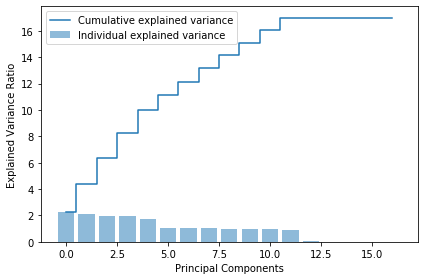

In [36]:
plt.figure(figsize=(6 , 4))
plt.bar(range(17), pc.explained_variance_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(17), cu_sum, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [37]:
x_pc

array([[ 4.26202094e-01, -6.22544728e-01,  2.03861743e-01, ...,
        -1.23862678e-03, -4.40707248e-04,  1.74935160e-04],
       [-3.73361977e+00, -6.03726242e-01,  2.19924366e+00, ...,
        -1.04621496e-03, -5.63522302e-04, -2.33668780e-04],
       [ 2.28489978e+00,  2.71313810e+00,  1.37416752e+00, ...,
         7.84318802e-04, -3.50276891e-04,  9.67114163e-05],
       ...,
       [-1.14999841e-01,  2.53772458e+00, -9.08753250e-01, ...,
         4.13971686e-04,  8.02740129e-04,  8.92295166e-05],
       [-9.28134448e-01, -1.10273908e+00, -1.09178711e-01, ...,
        -2.85749102e-04,  7.15120913e-05, -1.95227656e-04],
       [-1.54768748e+00, -1.34684778e+00,  9.68139513e-01, ...,
        -9.88572996e-04, -5.35097549e-04,  2.44822309e-04]])

In [38]:
## converting the principal components to a dataframe for easy handling
x_pc_df = pd.DataFrame(x_pc)

In [39]:
x_pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.426202,-0.622545,0.203862,-0.496837,-1.966037,-0.078687,-0.221998,-2.115933,-0.545310,0.393452,0.584224,1.622066,-0.020591,-0.000438,-0.001239,-0.000441,0.000175
1,-3.733620,-0.603726,2.199244,2.495576,1.773887,0.333836,2.117836,-1.072851,0.796748,2.636826,-1.683964,-0.156683,-0.026792,-0.001177,-0.001046,-0.000564,-0.000234
2,2.284900,2.713138,1.374168,0.764766,-1.633349,-0.726851,-0.012030,-0.457236,2.596173,0.916759,0.905385,0.251841,0.012466,-0.000630,0.000784,-0.000350,0.000097
3,-2.930953,-0.003353,-1.166049,-0.105833,-0.981110,0.535511,-0.651162,-0.395779,0.749291,-1.691444,1.589993,0.568742,-0.009338,-0.002912,-0.000196,-0.000623,-0.000193
4,2.190197,-3.829548,-1.363185,0.008886,1.729684,-1.285492,2.469223,2.017709,0.082426,2.823734,2.229394,-0.062012,-0.538304,0.002177,-0.000467,-0.000397,0.000182


In [40]:
### Slecting the first 7 principal components for training the model. 
## Remember the first 7 principal components explains the around 71% of the varianc ein the input variables 
x_df  = x_pc_df.iloc[:,:7]

In [41]:
x_df.head()

,0,1,2,3,4,5,6
0,0.426202,-0.622545,0.203862,-0.496837,-1.966037,-0.078687,-0.221998
1,-3.733620,-0.603726,2.199244,2.495576,1.773887,0.333836,2.117836
2,2.284900,2.713138,1.374168,0.764766,-1.633349,-0.726851,-0.012030
3,-2.930953,-0.003353,-1.166049,-0.105833,-0.981110,0.535511,-0.651162
4,2.190197,-3.829548,-1.363185,0.008886,1.729684,-1.285492,2.469223


In [42]:
print(x_df.shape)

(1623, 7)


In [43]:
## Notice that the principal components doesn't exhibhit any correlation.
## correlation among the principal components is dead Zero. 
x_df.corr()

,0,1,2,3,4,5,6
0,1.000000e+00,3.556555e-17,8.637761e-17,5.104825e-16,2.188905e-16,-3.889825e-17,6.646823e-18
1,3.556555e-17,1.000000e+00,5.855626e-16,6.599001e-16,6.946425e-16,-4.602163e-17,-1.994917e-16
2,8.637761e-17,5.855626e-16,1.000000e+00,-4.873844e-16,-6.614745e-16,-4.262245e-17,-1.092146e-16
3,5.104825e-16,6.599001e-16,-4.873844e-16,1.000000e+00,-1.600939e-16,9.697811e-19,-7.333036e-17
4,2.188905e-16,6.946425e-16,-6.614745e-16,-1.600939e-16,1.000000e+00,-1.571269e-16,3.641428e-17
5,-3.889825e-17,-4.602163e-17,-4.262245e-17,9.697811e-19,-1.571269e-16,1.000000e+00,-2.938290e-16
6,6.646823e-18,-1.994917e-16,-1.092146e-16,-7.333036e-17,3.641428e-17,-2.938290e-16,1.000000e+00


In [44]:
## Train and test split of data
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size = 0.2, random_state = 123)

In [45]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [46]:

pred = lg.predict(x_test)

In [47]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[224  10]
 [ 66  25]]
0.7661538461538462


## Final inference
    1. The first 7 princiapal components gave same or better accuracy than the model with original variables 
    2. The principal components model is better becoz the principal components are truly independent from eahc other without multicollinearity 
    3. Generalizes well and simplicity(less number of features) 